# ANGULAR POWER SPECTRUM

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

from astropy.cosmology import FlatLambdaCDM
from skypy.power_spectrum import growth_function

cosmo = FlatLambdaCDM(H0=67.11, Ob0=0.049, Om0= 0.2685)

import sys
sys.path.append("../power/EDS/")
from matter import matter_power_spectrum_1loop as P1loop
from matter import matter_unequal_time_power_spectrum as Puetc
# from unequalpy.power import matter_power_spectrum_1loop as P1loop
# from unequalpy.power import matter_unequal_time_power_spectrum as Puetc

### FAST-PT PRECOMPUTED VALUES

In [2]:
d = np.loadtxt('Pfastpt.txt',unpack=True)
ks = d[:, 0]
pk = d[:, 1]
p22 = d[:, 2]
p13 = d[:, 3]

p11_int = interp1d( ks, pk, fill_value="extrapolate")
p22_int = interp1d( ks, p22, fill_value="extrapolate")
p13_int = interp1d( ks, p13, fill_value="extrapolate")
powerk = (p11_int, p22_int, p13_int)

## POWER SPECTRA

The normalised growth function from SkyPy:

In [3]:
g0 = growth_function(0, cosmo)
D0 = growth_function(0, cosmo) / g0
D1 = growth_function(1, cosmo) / g0
D2 = growth_function(2, cosmo) / g0
Dvec = np.array([D0,D1])
Dvec2 = np.array([D0,D1, D2])

In [4]:
z_list = np.linspace(0, 1100,num=1000000)
xl = cosmo.comoving_distance(z_list).value
zatx = interp1d( xl, z_list, fill_value="extrapolate")

* Filters

In [5]:
sys.path.append("../lensing/")
from angular_power import cl_dirac
from filter import filter_convergence as filt

In [6]:
from filter import lensing_efficiency as le
from astropy import units
from astropy import constants as const
c = const.c.to('km/s')
H0= cosmo.H(0)
constant = (1.5 * cosmo.Om0 * H0**2 / c**2).value
# constant = 1.669e-11*pars.H0**2*pars.omegam
def le1(x):
    return constant*le(x, 1)
def le2(x):
    return constant*le(x, 2)

### Plots

In [8]:
ell = 2 * np.logspace(-2,3)
cl_D = cl_dirac(ell,le1, le2, powerk, growth_function, cosmo)

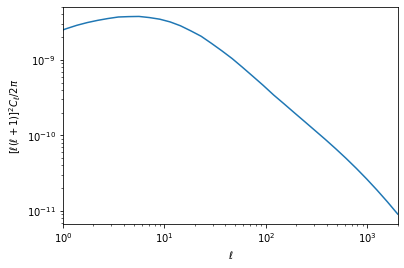

In [11]:
#plot
plt.loglog(ell, cl_D)
plt.ylabel('$[\ell(\ell+1)]^2C_\ell/2\pi$')
plt.xlabel('$\ell$')
plt.xlim([1,2000])
plt.show()